In [33]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim

In [14]:
from torch.utils.data import DataLoader

In [2]:
import numpy

In [3]:
from tensorflow.keras.datasets import mnist

C:\Users\maddo\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
for i in range(0,5):
    print(train_labels[i])

5
0
4
1
9


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
def viewImage(x,y):
    trans = torchvision.transforms.ToPILImage()
    plt.matshow(x)
    plt.show()
    print(y)

In [8]:
val=23

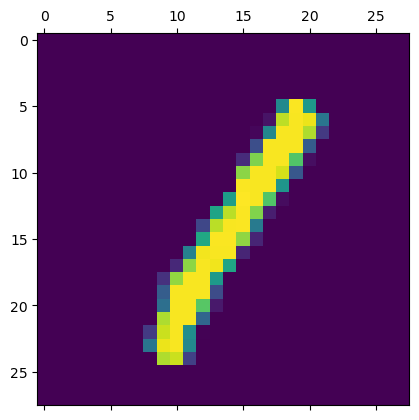

1


In [9]:
viewImage(train_images[val],train_labels[val])

In [10]:
train_images=torch.tensor(train_images)

In [11]:
train_images=train_images.view(60000,-1)

In [12]:
train_images.shape

torch.Size([60000, 784])

In [23]:
class neural(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,1000)
        self.fc2=nn.Linear(1000,500)
        self.fc3=nn.Linear(500,10)
        self.relu=nn.ReLU()
    def forward(self,x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x
        
        
        
    

In [24]:
ha=neural()

In [29]:
class newdataset(Dataset):
    def __init__(self,data,labels):
        self.data=data
        self.labels=labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self,idx):
        sampledata=self.data[idx]
        samplelabels=self.labels[idx]
        return torch.tensor(sampledata,dtype=torch.float32),torch.tensor(samplelabels,dtype=torch.long)

In [30]:
finaldataset=newdataset(train_images,train_labels)

In [31]:
LoadedData=DataLoader(finaldataset,batch_size=60)

In [35]:
optimizer=optim.Adam(ha.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

In [37]:
for i in range(50):
    totloss=0
    for data,labels in LoadedData:
        out=ha(data)
        loss=criterion(out,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        totloss+=loss
    print(f"In epoch {i} the total loss is {totloss} ")

            

C:\Users\maddo\AppData\Local\Temp\ipykernel_15216\4107407390.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sampledata,dtype=torch.float32),torch.tensor(samplelabels,dtype=torch.long)


In epoch 0 the total loss is 411.8464050292969 
In epoch 1 the total loss is 145.5757598876953 
In epoch 2 the total loss is 135.9055938720703 
In epoch 3 the total loss is 116.25657653808594 
In epoch 4 the total loss is 119.18490600585938 
In epoch 5 the total loss is 105.35431671142578 
In epoch 6 the total loss is 102.8156967163086 
In epoch 7 the total loss is 104.84580993652344 
In epoch 8 the total loss is 81.5821304321289 
In epoch 9 the total loss is 85.77628326416016 
In epoch 10 the total loss is 81.48194122314453 
In epoch 11 the total loss is 62.615318298339844 
In epoch 12 the total loss is 70.93902587890625 
In epoch 13 the total loss is 72.443603515625 
In epoch 14 the total loss is 58.66124725341797 
In epoch 15 the total loss is 47.20107650756836 
In epoch 16 the total loss is 55.0314826965332 
In epoch 17 the total loss is 62.6364631652832 
In epoch 18 the total loss is 54.25590896606445 
In epoch 19 the total loss is 47.51406478881836 
In epoch 20 the total loss is 

In [38]:
torch.save(ha, 'my_model.pt')

In [43]:
test_images.shape

(10000, 28, 28)

In [45]:
test_images=torch.tensor(test_images,dtype=torch.float32)

In [46]:
test_images=test_images.view(10000,-1)

In [47]:
finaltrain=newdataset(test_images,test_labels)

In [48]:
Loadedtrain=DataLoader(finaltrain,batch_size=100)

In [63]:
for data,label in Loadedtrain:
    out=ha(data)
    val=torch.argmax(out,dim=1)
    tmp=(val==label).sum()
    print(f"Accuracies for each epoch are {tmp} %")

C:\Users\maddo\AppData\Local\Temp\ipykernel_15216\4107407390.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sampledata,dtype=torch.float32),torch.tensor(samplelabels,dtype=torch.long)


Accuracies for each epoch are 100 %
Accuracies for each epoch are 100 %
Accuracies for each epoch are 97 %
Accuracies for each epoch are 97 %
Accuracies for each epoch are 98 %
Accuracies for each epoch are 98 %
Accuracies for each epoch are 97 %
Accuracies for each epoch are 100 %
Accuracies for each epoch are 98 %
Accuracies for each epoch are 96 %
Accuracies for each epoch are 97 %
Accuracies for each epoch are 93 %
Accuracies for each epoch are 94 %
Accuracies for each epoch are 96 %
Accuracies for each epoch are 98 %
Accuracies for each epoch are 92 %
Accuracies for each epoch are 98 %
Accuracies for each epoch are 97 %
Accuracies for each epoch are 98 %
Accuracies for each epoch are 97 %
Accuracies for each epoch are 96 %
Accuracies for each epoch are 93 %
Accuracies for each epoch are 96 %
Accuracies for each epoch are 96 %
Accuracies for each epoch are 94 %
Accuracies for each epoch are 97 %
Accuracies for each epoch are 96 %
Accuracies for each epoch are 97 %
Accuracies for ea